In [42]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [43]:
# Data Cleaning


#importing the data that I will be cleaning and using 
#importing sp_tsx data 
path_two = Path("/Users/welcome/Desktop/pandas_homework/sp_tsx.csv")

sp_tsx_df = pd.read_csv(path_two, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df = sp_tsx_df.sort_index()


#importing algo_returns data
path_three = Path("/Users/welcome/Desktop/pandas_homework/algo_returns.csv")

algo_returns_df = pd.read_csv(path_three, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = algo_returns_df.sort_index()


#importing whale_data and dislaying first 5 lines 
path = Path("/Users/welcome/Desktop/pandas_homework/whaledata.csv")

whale_data_df = pd.read_csv(path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_data_df = whale_data_df.sort_index()



In [44]:
#Whale Data

whale_data_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [45]:
#dropping the nulls and verifying 
whale_data_df.dropna(inplace = True)
whale_data_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [46]:
#Algo trading Data 

#read the data

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [47]:
#dropping the nulls and verifying 
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [48]:
#S&P TSX Data 
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [49]:
#check the data type of the df
sp_tsx_df.dtypes

Close    object
dtype: object

In [50]:
#changing the '$' and ',' to blanks "close" coloumn

# this step for some reason works sometimes and other times is says traceback error the close coloumn in a .str value 

sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")
sp_tsx_df["Close"]

<ipython-input-50-52eeaa0392bf>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [159]:
# calculating the pct change, then taking the results and dropping NA and replacing the close column to something more specific
sp_tsx_dailyreturns = sp_tsx_df.pct_change()
sp_tsx_dailyreturns.dropna(inplace=True)
sp_tsx_dailyreturns.columns = ["Returns History"]
sp_tsx_dailyreturns.head()

,Returns History
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [161]:
#combining all the data frames into one 
combined_data_df = pd.concat([whale_data_df, algo_returns_df, sp_tsx_dailyreturns], axis = "columns", join = "inner")
combined_data_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Returns History
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

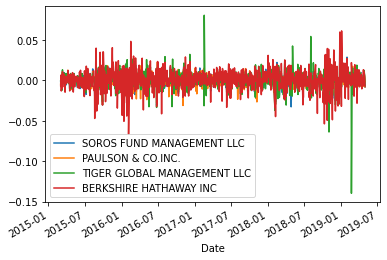

In [162]:
#Conduct Quantitative Analysis 
#Performance analysis
#plotting the whale data 
whale_data_df.plot()


<AxesSubplot:xlabel='Date'>

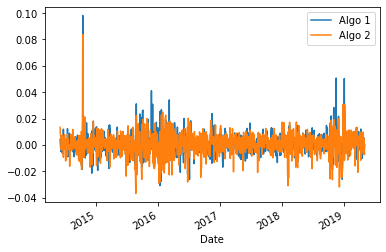

In [163]:
#plotting the algo data
algo_returns_df.plot()

<AxesSubplot:xlabel='Date'>

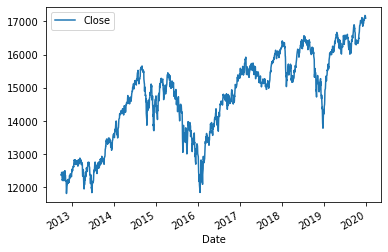

In [164]:
#plotting the S&P data 
sp_tsx_df.plot()

<AxesSubplot:xlabel='Date'>

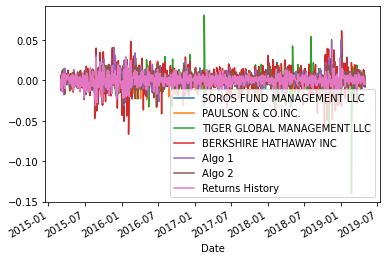

In [165]:
#plotting the combined data 
combined_data_df.plot()

In [166]:
#calculating the cummlaitve returns 

cumalitive_whaledata = (1 + whale_data_df).cumprod() - 1
cumalitive_algodata = (1 + algo_returns_df).cumprod() - 1
cumalitiv_spdata =  (1 + sp_tsx_df).cumprod() - 1
cumaltive_data_overall = (1 + combined_data_df).cumprod() - 1

<AxesSubplot:xlabel='Date'>

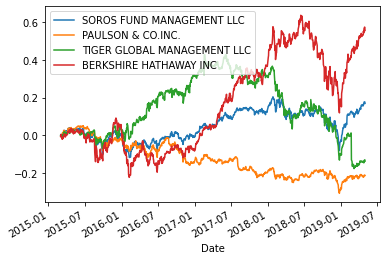

In [167]:
#plotting all the cumalitive returns
cumalitive_whaledata.plot()

<AxesSubplot:xlabel='Date'>

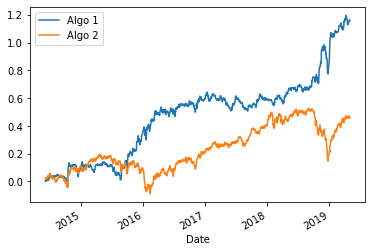

In [168]:
cumalitive_algodata.plot()

<AxesSubplot:xlabel='Date'>

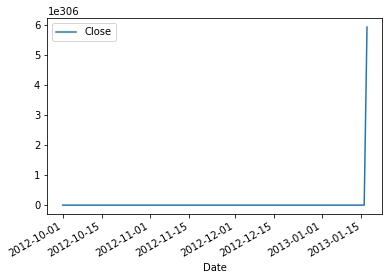

In [169]:
cumalitiv_spdata.plot()

<AxesSubplot:xlabel='Date'>

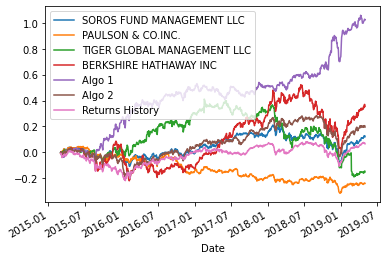

In [170]:
cumaltive_data_overall.plot()

<AxesSubplot:>

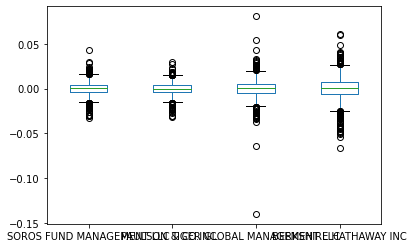

In [171]:
#Risk Analysis
# plotting a box plot for each portfolio 
whale_data_df.plot.box()

<AxesSubplot:>

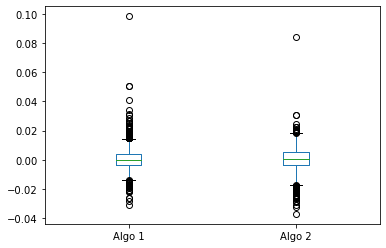

In [172]:
algo_returns_df.plot.box()

<AxesSubplot:>

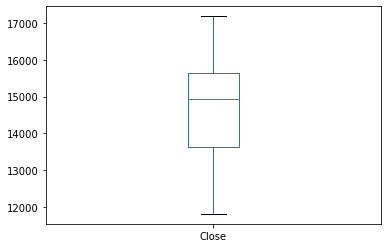

In [173]:
sp_tsx_df.plot.box()

<AxesSubplot:>

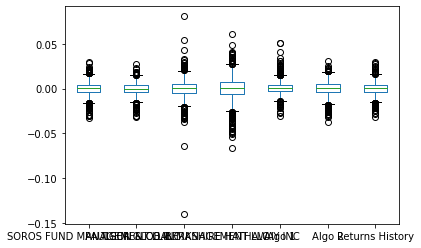

In [174]:
combined_data_df.plot.box()

In [175]:
#calculate the standard deviation for each 

whale_std = np.std(whale_data_df)
whale_std


SOROS FUND MANAGEMENT LLC      0.007838
PAULSON & CO.INC.              0.006974
TIGER GLOBAL MANAGEMENT LLC    0.010819
BERKSHIRE HATHAWAY INC         0.012825
dtype: float64

In [176]:
algo_std = np.std(algo_returns_df)
algo_std

Algo 1    0.007984
Algo 2    0.008463
dtype: float64

In [177]:
sp_std = np.std(sp_tsx_df)
sp_std

Close    1327.972234
dtype: float64

In [178]:
combined_std = np.std(combined_data_df)
combined_std

SOROS FUND MANAGEMENT LLC      0.007824
PAULSON & CO.INC.              0.006979
TIGER GLOBAL MANAGEMENT LLC    0.010877
BERKSHIRE HATHAWAY INC         0.012819
Algo 1                         0.007585
Algo 2                         0.008322
Returns History                0.007031
dtype: float64

In [179]:
#Which portfolios are the riskiest in the s&p 60
higher_risk = combined_data_df["Returns History"]
higher_risk

Date
2015-03-03   -0.008530
2015-03-04   -0.003371
2015-03-05    0.001344
2015-03-06   -0.009972
2015-03-09   -0.006555
                ...   
2019-04-25   -0.000628
2019-04-26    0.002254
2019-04-29   -0.000788
2019-04-30   -0.001183
2019-05-01   -0.004703
Name: Returns History, Length: 1029, dtype: float64

In [180]:
#riskier_than_SP60 = higher_risk.sort_values(ascending= False)
#print(riskier_than_SP60)
combined_std = combined_std.sort_values(ascending= False)
print(combined_std)

BERKSHIRE HATHAWAY INC         0.012819
TIGER GLOBAL MANAGEMENT LLC    0.010877
Algo 2                         0.008322
SOROS FUND MANAGEMENT LLC      0.007824
Algo 1                         0.007585
Returns History                0.007031
PAULSON & CO.INC.              0.006979
dtype: float64


In [181]:
# All except for PAULSON & CO are riskier 

In [182]:
#Annulized standard Deviation over 252 trading days
#whale_annual = whale_data_df * np.sqrt(252)
#whale_annual

In [183]:
annual_std = combined_std * np.sqrt(252)
annual_std

BERKSHIRE HATHAWAY INC         0.203500
TIGER GLOBAL MANAGEMENT LLC    0.172675
Algo 2                         0.132113
SOROS FUND MANAGEMENT LLC      0.124199
Algo 1                         0.120411
Returns History                0.111610
PAULSON & CO.INC.              0.110787
dtype: float64

<AxesSubplot:xlabel='Date'>

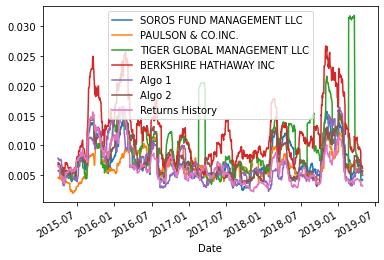

In [184]:
#Rolling Statistics 

#the rolling standard deviation over a 21 day window 
rolling_std = combined_data_df.rolling(window = 21).std()
rolling_std.plot()

In [185]:
#calculate and plot the correlsation 
correlation = combined_data_df.corr()
correlation 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Returns History
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
Returns History,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [186]:
# Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX
covariance = combined_data_df["SOROS FUND MANAGEMENT LLC"].cov(combined_data_df["Returns History"])
print("The covariance of SOROS is", covariance)

The covariance of SOROS is 3.710689907855223e-05


In [187]:
#calculating the variance
variance = combined_data_df["Returns History"]
variance

Date
2015-03-03   -0.008530
2015-03-04   -0.003371
2015-03-05    0.001344
2015-03-06   -0.009972
2015-03-09   -0.006555
                ...   
2019-04-25   -0.000628
2019-04-26    0.002254
2019-04-29   -0.000788
2019-04-30   -0.001183
2019-05-01   -0.004703
Name: Returns History, Length: 1029, dtype: float64

In [188]:
#calculating the beta 
beta = covariance/variance
print(beta)

Date
2015-03-03   -0.004350
2015-03-04   -0.011009
2015-03-05    0.027611
2015-03-06   -0.003721
2015-03-09   -0.005661
                ...   
2019-04-25   -0.059067
2019-04-26    0.016464
2019-04-29   -0.047095
2019-04-30   -0.031364
2019-05-01   -0.007890
Name: Returns History, Length: 1029, dtype: float64


<AxesSubplot:xlabel='Date'>

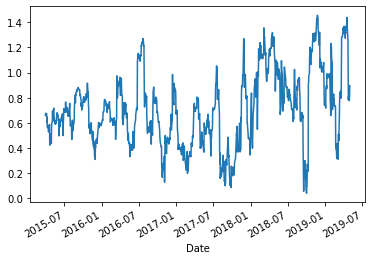

In [189]:
#calculate the rolling covariance over a 21 day window
rolling_corr = combined_data_df["SOROS FUND MANAGEMENT LLC"].rolling(window =  21).cov(combined_data_df["Returns History"])
colling_varr = combined_data_df["Returns History"].rolling(window = 21).var()
rolling_beta = rolling_corr/colling_varr
rolling_beta.plot()


In [190]:
# optional challenge
###### expo_weighted = combined_data_df.ewm(window = 21).mean()
#expo_weighted = combined_data_df.ewm(.rolling(window= 21)).mean()

expo_weighted = combined_data_df.ewm(halflife = 21).mean() 

expo_weighted.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Returns History
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436


<AxesSubplot:>

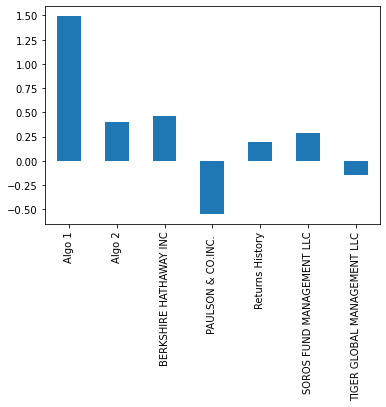

In [191]:
sharpe_ratios = (combined_data_df.mean() * 252) / annual_std
sharpe_ratios.plot (kind= 'bar')

In [192]:
# algo 1 outperfroms the whale strategy and the S&P 60 

In [193]:
#Create a Custom Portfolio 

# import data from 1st stock 
lobpath = Path("/Users/welcome/Desktop/pandas_homework/l_historical.csv")
loblaw_data = pd.read_csv(lobpath, index_col = "Date", infer_datetime_format=True, parse_dates=True)
loblaw_data = loblaw_data.sort_index()

In [194]:
#import the data for the 2nd stock
otexpath = Path("/Users/welcome/Desktop/pandas_homework/otex_historical.csv")
otex_data = pd.read_csv(otexpath, index_col = "Date", infer_datetime_format=True, parse_dates=True)
otex_data = otex_data.sort_index()

In [195]:
#import data for the 3rd stock
shoppath = Path("/Users/welcome/Desktop/pandas_homework/shop_historical.csv")
shop_data = pd.read_csv(shoppath, index_col = "Date", infer_datetime_format=True, parse_dates=True)
shop_data = shop_data.sort_index()

In [196]:
#combine all the data into a single data frame
combined_custom_df = pd.concat([loblaw_data,otex_data,shop_data],  axis = "rows", join = "inner")
combined_custom_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [197]:
 #reset the index
combined_custom_df = combined_custom_df.reset_index()

In [198]:
#reset the date index and  set each stock to a single coloumn 

combined_custom_df = combined_custom_df.reset_index()
combined_custom_df = combined_custom_df.pivot_table(values = "Close", index = "Date", columns = "Symbol")
combined_custom_df.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [199]:
# calculate pct change, drop NAs and display data

combined_daily_df = combined_custom_df.pct_change()
combined_daily_df.dropna(inplace = True)
combined_daily_df.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


In [200]:
 #Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

#weights = [.2, .2, .2]

 # Set weights
weights = [1/3, 1/3, 1/3]
portfolio_returns = combined_daily_df.dot(weights)
portfolio_returns.head()

# Calculate portfolio return

# Display sample data

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

In [201]:
combined_data_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Returns History
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [202]:
#Joining the data to the Combined_df 

combined_data_df["Custom Portfolio Returns"] = portfolio_returns
combined_data_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Returns History,Custom Portfolio Returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN


In [203]:
combined_data_df.dropna(inplace = True)
combined_data_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Returns History,Custom Portfolio Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [205]:
#Re-run the risk analysis with your portfolio to see how it compares to the others

#annual return 
annual_custom_std = np.std(combined_data_df) * np.sqrt(252)
annual_custom_std

SOROS FUND MANAGEMENT LLC      0.145452
PAULSON & CO.INC.              0.114169
TIGER GLOBAL MANAGEMENT LLC    0.219497
BERKSHIRE HATHAWAY INC         0.227098
Algo 1                         0.119845
Algo 2                         0.137454
Returns History                0.098970
Custom Portfolio Returns       0.224003
dtype: float64

In [207]:
# Calculate and plot rolling std with 21-day window
custom_rolling = combined_data_df.rolling(window=21).std()
custom_rolling.plot

<AxesSubplot:>

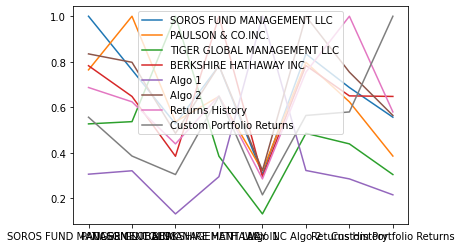

In [209]:
#calculate correlation and plot
custom_corr = combined_data_df.corr()
custom_corr.plot()

In [210]:
# Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX
cov_custom = combined_data_df["Custom Portfolio Returns"].cov(combined_data_df["Returns History"])
varr_custom = combined_data_df["Returns History"].rolling(window = 21).var()
beta_custom = cov_custom/varr_custom
beta_custom

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    4.500236
2019-04-26    4.633144
2019-04-29    4.539007
2019-04-30    4.868844
2019-05-01    5.149974
Name: Returns History, Length: 328, dtype: float64

<AxesSubplot:xlabel='Date'>

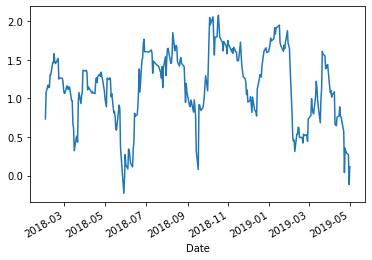

In [212]:
rolling_cov_custom = combined_data_df["Custom Portfolio Returns"].rolling(window=21).cov(combined_data_df["Returns History"])
rolling_variance_custom = combined_data_df["Returns History"].rolling(window = 21).var()
rolling_beta_custom = rolling_cov_custom/rolling_variance_custom
rolling_beta_custom.plot()

<AxesSubplot:>

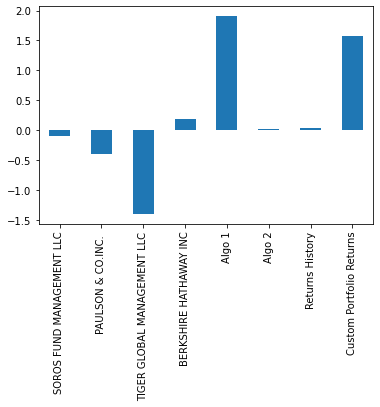

In [214]:
# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

#calculate sharpe ratio and plot
custom_sharperatio = (combined_data_df.mean() * 252) / annual_custom_std
custom_sharperatio.plot(kind='bar')

In [ ]:
#The custom portfolio does exceptional in comparison to the others and nearly does as well as the 'Algo1' there is a .5 difference 